# Introduction

Copyright Australian Conservation Foundation (ACF). All rights reserved.<br>
Concept by Kim Garratt, Annica Schoor and the ACF 2021.<br>
Software developed by Ewan Short 2021. <br>
<eshort0401@gmail.com>, <https://github.com/eshort0401> <br>

This notebook provides some examples of the analyses the ACF may wish to conduct using `EPBC_database.csv`.  

# Setup

Load some data science modules and configure the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

Specify the base directory for the project.

In [2]:
# base_dir = '' 

# Use default Windows base_directory.
if os.name == 'nt':
    base_dir = 'C:/Users/{}/'.format(os.getlogin())
    base_dir += 'Documents/ACF_consulting/'

# Exploring the Database Using pandas

Load the EPBC database, and show a sample of its contents. 

In [3]:
table = pd.read_csv(base_dir + 'EPBC_database_copy.csv', dtype=str)
table

,Reference Number,Title of referral,Notification from EPBC Act,Date of notice,PDF Attachments,Non PDF Attachments,Download,Registered Name,Type,ABN,ACN,Download Folder,PDFs Combined,Approval Holder,Industry,Holder Address,State,Description
0,2021/8977,Elizabeth Borrello/Commercial Development/Flyn...,Invitation for Public Comment on Referral,22/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20218977_22062021_eb_ifpcor,Yes,Elizabeth Borrello,Commercial Development,"Flynn drive, Neerabup",Western Australia,Subdivision of Lot 902 Flynn Drive Neerabup fo...
1,2013/7098,JONES THEATRE UNIT TRUST/Residential Developme...,Notification of Variation to Approval,21/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20137098_21062021_jtut_novta,Yes,JONES THEATRE UNIT TRUST,Residential Development,Busselton,Western Australia,"Residential development Lot 3, 500 Bussell Hig..."
2,2013/7098,JONES THEATRE UNIT TRUST/Residential Developme...,Notification of Extension of Period of Effect ...,21/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20137098_21062021_jtut_noeopoeoa,Yes,JONES THEATRE UNIT TRUST,Residential Development,Busselton,Western Australia,"Residential development Lot 3, 500 Bussell Hig..."
3,2021/8910,Mt Fox Energy Park Pty Ltd/Energy Generation a...,Decision on Assessment Approach: Preliminary D...,18/06/2021,Yes,No,Success,MOUNT FOX ENERGY PARK PTY LTD (Confirm manually.),Australian Proprietary Company (Confirm manual...,39636341627 (Confirm manually.),636341627 (Confirm manually.),20218910_18062021_mfeppl_doaapd,Yes,Mt Fox Energy Park Pty Ltd,Energy Generation and Supply (renewable),", Mount Fox",Queensland,"Mt Fox Energy Park Wind Farm, QLD"
4,2021/8969,Byron Shire Council/Waste Management (sewerage...,Suspension of Referral Decision Timeframe Period,18/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20218969_18062021_bsc_sordtp,Yes,Byron Shire Council,Waste Management (sewerage),"45 Wallum Place, Byron Bay",New South Wales,Byron Shire Bioenergy Facility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,2018/8318,COMMON GROUND PROPERTY (NSW) PTY LTD/Residenti...,Decision on approval of action: Approved with ...,22/11/2019,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20188318_22112019_cgpnpl_doaoaawc,Yes,Improperly formatted Title of referral - input...,Improperly formatted Title of referral - input...,Improperly formatted Title of referral - input...,Improperly formatted Title of referral - input...,Improperly formatted Title of referral - input...
1795,2019/8504,QUEENSLAND COKING COAL PTY LTD/Mining/The proj...,Decision whether action needs approval/Approva...,22/11/2019,Yes,No,Success,QUEENSLAND COKING COAL PTY LTD,Australian Proprietary Company,71129600004,129600004,20198504_22112019_qccpl_dwanaanr,Yes,QUEENSLAND COKING COAL PTY LTD,Mining,The project lies within Lot 10 on Plan SP208611,Queensland,Vulcan Bulk Sample Project
1796,2019/8513,GB ENERGY (VIC) PTY LIMITED/Energy Generation ...,Decision whether action needs approval/Approva...,22/11/2019,Yes,No,Success,GB ENERGY (VIC) PTY LIMITED,Australian Proprietary Company,63615553010,615553010,20198513_22112019_gevpl_dwanaar,Yes,GB ENERGY (VIC) PTY LIMITED,Energy Generation and Supply (non-renewable),multiple - See Attachement 1.7.2,Victoria,Golden Beach Gas Project
1797,2019/8513,GB ENERGY (VIC) PTY LIMITED/Energy Generation ...,Decision on Assessment Approach: Not Applicabl...,22/11/2019,No,No,Not Applicable,GB ENERGY (VIC) PTY LIMITED,Australian Proprietary Company,63615553010,615553010,Not Applicable,Not Applicable,GB ENERGY (VIC) PTY LIMITED,Energy Generation and Supply (non-renewable),multiple - See Attachement 1.7.2,Victoria,Golden Beach Gas Project


# Creating Plots using matplotlib

Count all the company types from the table. Ignore those not yet filled or confirmed.

In [8]:
holder_type = table.groupby('Type')['Type'].count()
holder_labels = holder_type.keys().values
holder_counts = holder_type.values
# Drop unfilled and uncomfirmed entries.
holder_labels = holder_labels[[0,2,5,6]]
holder_counts = holder_counts[[0,2,5,6]]

Generate a pie chart.

Text(0.5, 1.0, 'Total Referrals by Organisation Type')

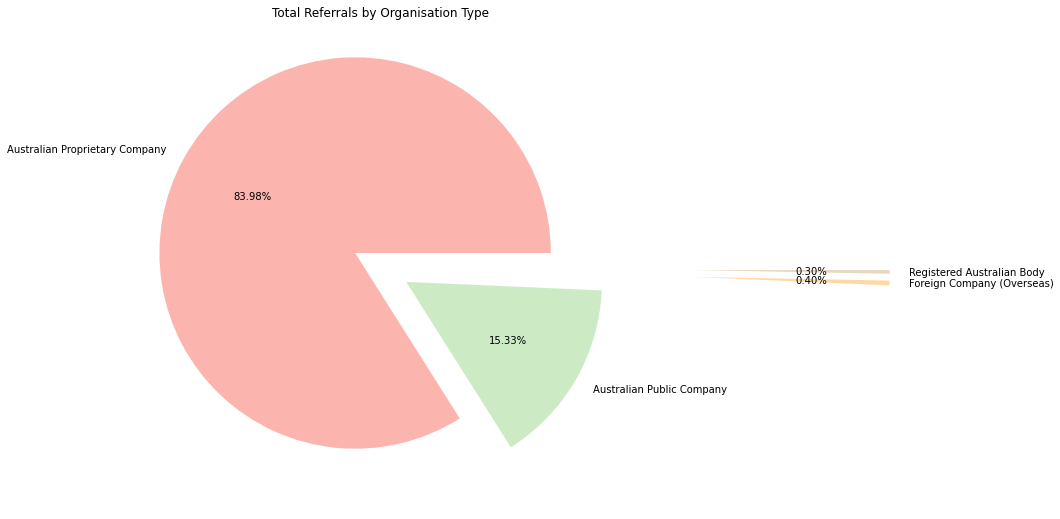

In [10]:
fig_app, ax_app = plt.subplots(figsize=(15, 9))
theme = plt.get_cmap('Pastel1')
ax_app.set_prop_cycle(
    "color", 
    [
        theme(1. * i / len(holder_counts))
         for i in range(len(holder_counts))])
plt.pie(
    holder_counts, labels=holder_labels, autopct='%1.2f%%', 
    explode=[.15, .15, 1.6, 1.6])
plt.title('Total Referrals by Organisation Type')